# IPL Match & Ball by Ball Performance Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Load Data
match_info = pd.read_csv(r'E:/ipl-data-analysis/data/ipl_match_data_2008-2023.csv')
ball_data = pd.read_csv(r'E:/ipl-data-analysis/data/ipl_ball_by_ball_data_2008-2023.csv', low_memory=False)

In [5]:
# Basic Checks
print(match_info.head())
print(match_info.info())

       id        date   season             event_name match_type match_number  \
0  335982  18-04-2008  2007/08  Indian Premier League        T20            1   
1  335983  19-04-2008  2007/08  Indian Premier League        T20            2   
2  335984  19-04-2008  2007/08  Indian Premier League        T20            3   
3  335986  20-04-2008  2007/08  Indian Premier League        T20            4   
4  335985  20-04-2008  2007/08  Indian Premier League        T20            5   

         city                                       venue  \
0   Bangalore                       M Chinnaswamy Stadium   
1  Chandigarh  Punjab Cricket Association Stadium, Mohali   
2       Delhi                            Feroz Shah Kotla   
3     Kolkata                                Eden Gardens   
4      Mumbai                            Wankhede Stadium   

                         team1                        team2  ...  \
0  Royal Challengers Bangalore        Kolkata Knight Riders  ...   
1         

In [6]:
print(ball_data.head())
print(ball_data.info())

       id   season                  venue           batting_team  \
0  335982  2007/08  M Chinnaswamy Stadium  Kolkata Knight Riders   
1  335982  2007/08  M Chinnaswamy Stadium  Kolkata Knight Riders   
2  335982  2007/08  M Chinnaswamy Stadium  Kolkata Knight Riders   
3  335982  2007/08  M Chinnaswamy Stadium  Kolkata Knight Riders   
4  335982  2007/08  M Chinnaswamy Stadium  Kolkata Knight Riders   

                  bowling_team  innings  over  ball  is_super_over  \
0  Royal Challengers Bangalore        1     0     1              0   
1  Royal Challengers Bangalore        1     0     2              0   
2  Royal Challengers Bangalore        1     0     3              0   
3  Royal Challengers Bangalore        1     0     4              0   
4  Royal Challengers Bangalore        1     0     5              0   

        batter  ... total_runs is_wkt_delivery  player_out  wkt_type  \
0   SC Ganguly  ...          1               0         NaN       NaN   
1  BB McCullum  ...       

In [7]:
# Column Cleanup
match_info.columns = match_info.columns.str.strip().str.lower()
ball_data.columns = ball_data.columns.str.strip().str.lower()

In [8]:
# Merge Datasets
merged_data = pd.merge(ball_data, match_info, left_on='id', right_on='id', how='left')

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_18116\2509257872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette='Blues_d')


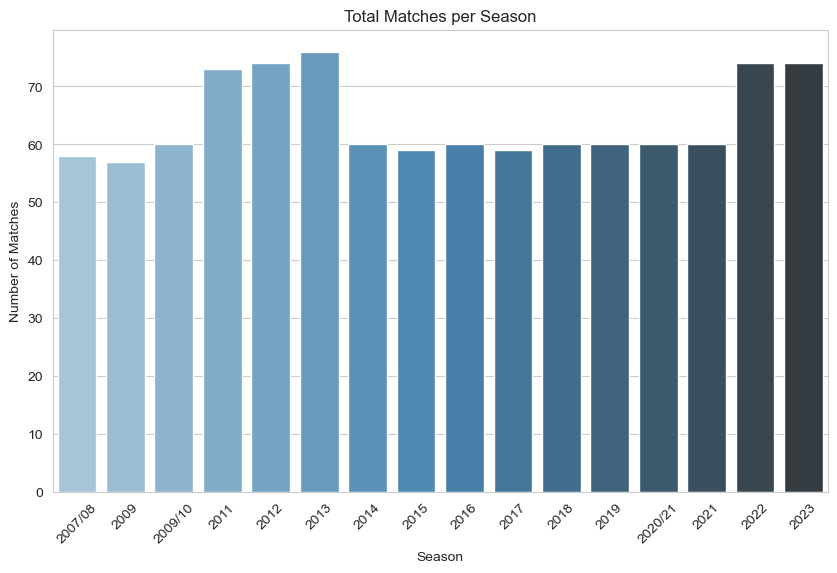

In [22]:
# visualization
# Total Matches per Season
plt.figure(figsize=(10,6))
matches_per_season = match_info['season'].value_counts().sort_index()
sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette='Blues_d')
plt.title("Total Matches per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.savefig(r'E:/ipl-data-analysis/output/graphs/total_matches_per_season.png', bbox_inches='tight')
plt.show()

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_18116\3768495161.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_percentage.index, y=win_percentage.values, palette='Oranges')


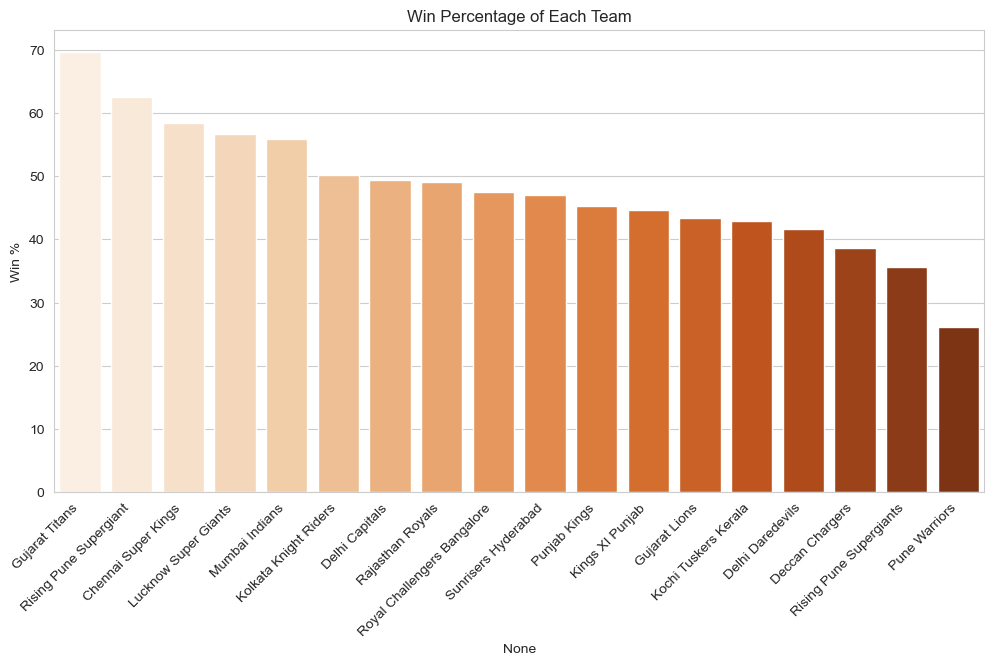

In [23]:
# Win % of Each Team
plt.figure(figsize=(12,6))
total_matches = match_info['team1'].value_counts() + match_info['team2'].value_counts()
wins = match_info['winner'].value_counts()
win_percentage = (wins / total_matches) * 100
win_percentage = win_percentage.dropna().sort_values(ascending=False)
sns.barplot(x=win_percentage.index, y=win_percentage.values, palette='Oranges')
plt.title("Win Percentage of Each Team")
plt.ylabel("Win %")
plt.xticks(rotation=45, ha='right')
plt.savefig(r'E:/ipl-data-analysis/output/graphs/win_percentage_each_team.png', bbox_inches='tight')
plt.show()

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_18116\4242919683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='Greens')


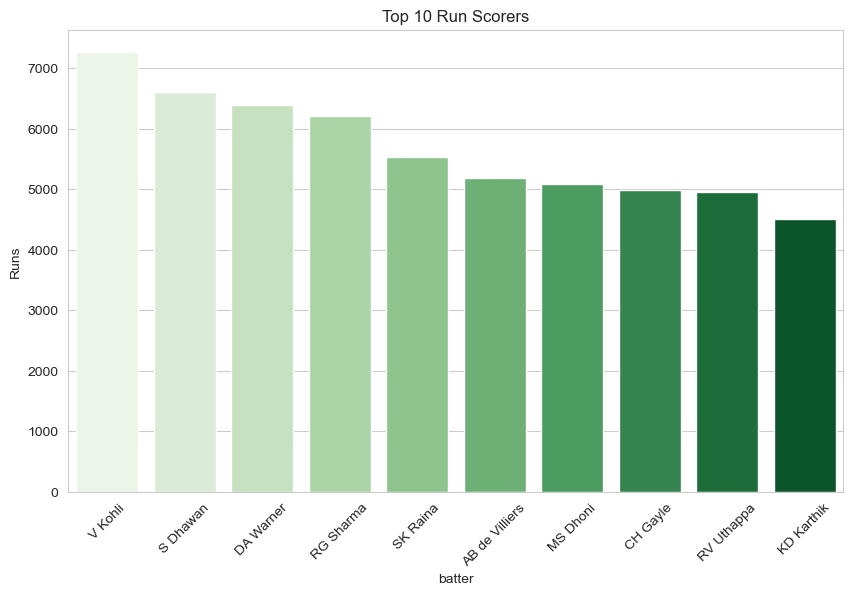

In [24]:
# Top Run Scorers
plt.figure(figsize=(10,6))
top_scorers = merged_data.groupby('batter')['runs_off_bat'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='Greens')
plt.title("Top 10 Run Scorers")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.savefig(r'E:/ipl-data-analysis/output/graphs/top_10_run_scorers.png', bbox_inches='tight')
plt.show()

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_18116\3489078487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette='Reds')


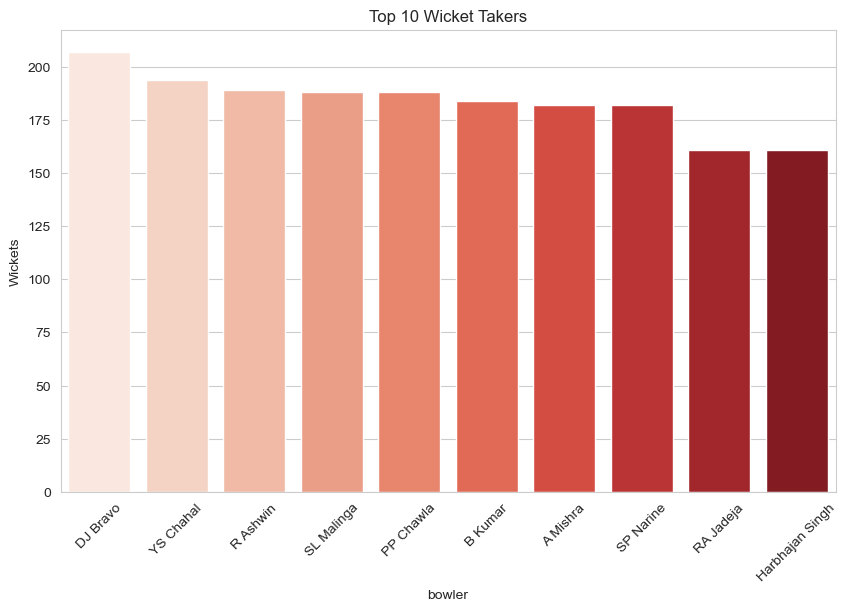

In [25]:
# Most Wickets Taken
plt.figure(figsize=(10,6))
wickets = merged_data[merged_data['wkt_type'].notnull()]
top_wicket_takers = wickets['bowler'].value_counts().head(10)
sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette='Reds')
plt.title("Top 10 Wicket Takers")
plt.ylabel("Wickets")
plt.xticks(rotation=45)
plt.savefig(r'E:/ipl-data-analysis/output/graphs/top_10_wicket_takers.png', bbox_inches='tight')
plt.show()

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_18116\1986988748.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_runs_per_venue.index, y=avg_runs_per_venue.values, palette='Purples')


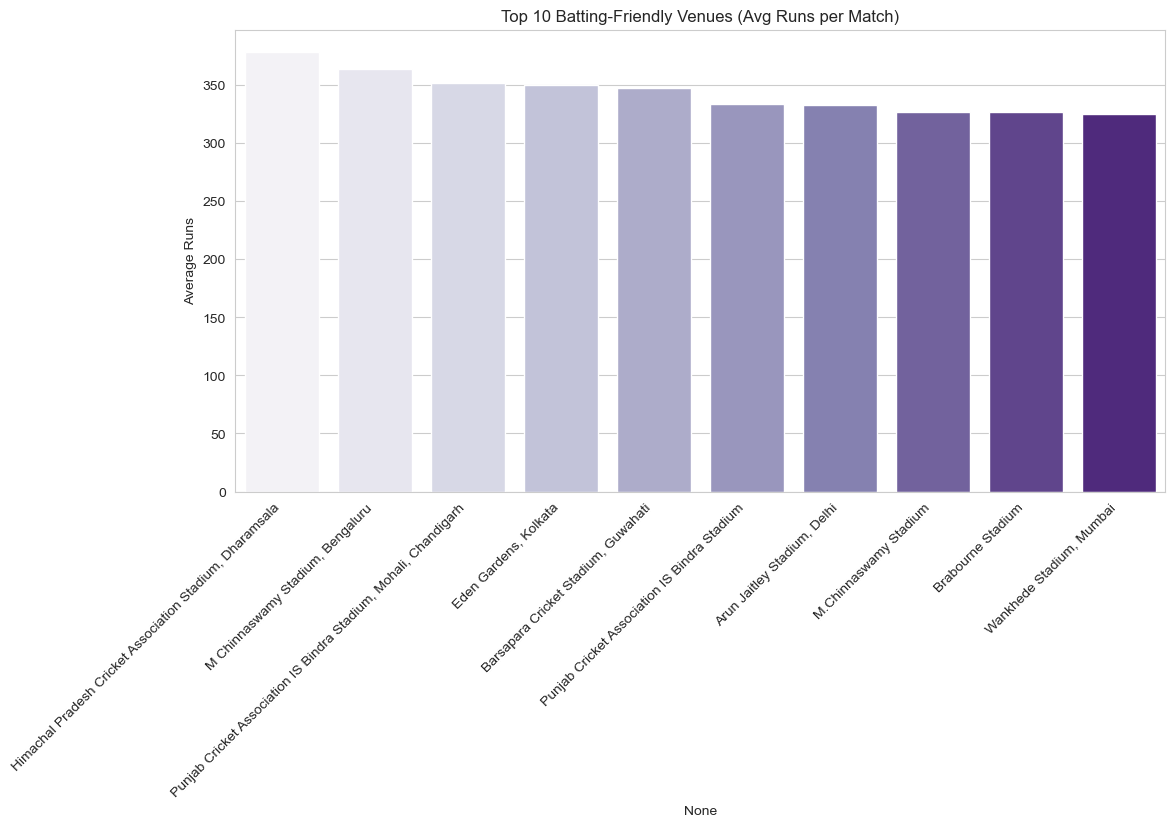

In [26]:
# Venue Analysis - Batting Friendly Venues
plt.figure(figsize=(12,6))
venue_runs = merged_data.groupby('venue_x')['runs_off_bat'].sum()
venue_matches = match_info['venue'].value_counts()
avg_runs_per_venue = (venue_runs / venue_matches).sort_values(ascending=False).head(10)
sns.barplot(x=avg_runs_per_venue.index, y=avg_runs_per_venue.values, palette='Purples')
plt.title("Top 10 Batting-Friendly Venues (Avg Runs per Match)")
plt.ylabel("Average Runs")
plt.xticks(rotation=45, ha='right')
plt.savefig(r'E:/ipl-data-analysis/output/graphs/top_10_batting_friendly_venues.png', bbox_inches='tight')
plt.show()

In [27]:
# Toss Impact
toss_wins = match_info[match_info['toss_winner'] == match_info['winner']]
toss_effect = (len(toss_wins) / len(match_info)) * 100
print(f"Toss winning team also won the match in {toss_effect:.2f}% cases.")

Toss winning team also won the match in 50.49% cases.


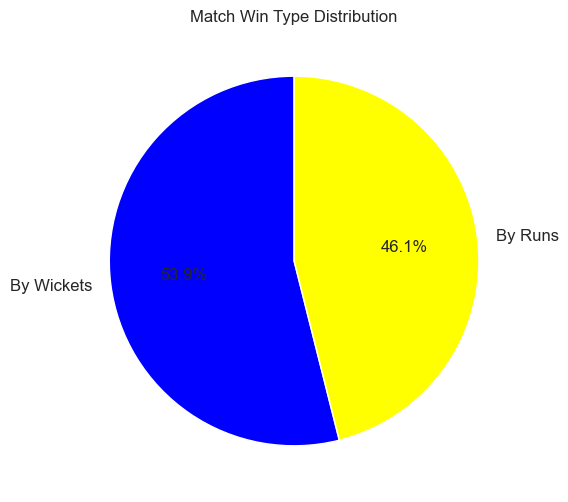

In [28]:
# Match Result Trends
plt.figure(figsize=(6,6))
result_data = match_info[['wonby', 'margin']].copy()
result_data = result_data.dropna()
result_data['win_type'] = result_data['wonby'].apply(lambda x: 'By Runs' if str(x).lower() == 'runs' else 'By Wickets')
result_data['win_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'yellow'], startangle=90, textprops={'fontsize': 12})
plt.title("Match Win Type Distribution")
plt.ylabel("")
plt.savefig(r'E:/ipl-data-analysis/output/graphs/match_win_type_distribution.png', bbox_inches='tight')
plt.show()

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_18116\1613309423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_six_hitters.index, y=top_six_hitters.values, palette='Oranges_r')


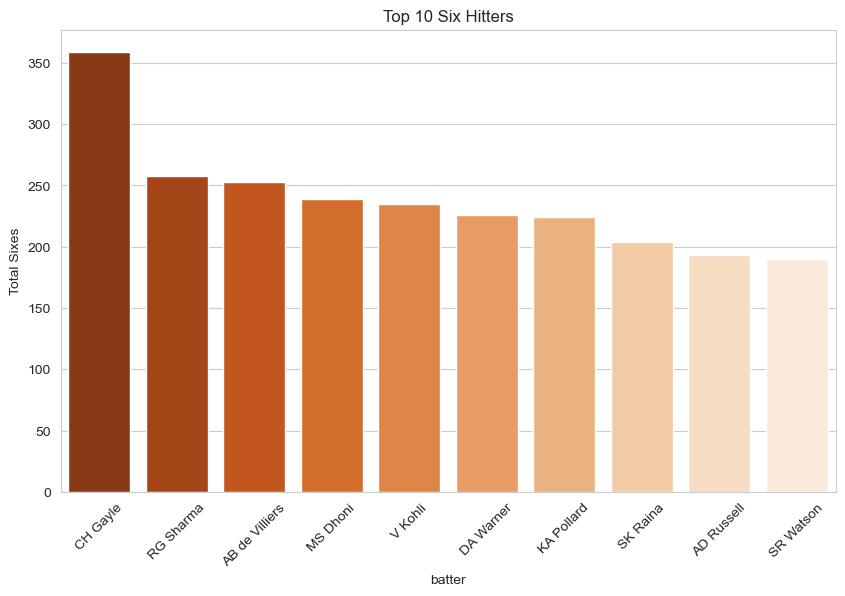

In [29]:
# Most Sixes Hit by Players
plt.figure(figsize=(10,6))
sixes = merged_data[merged_data['runs_off_bat'] == 6]
top_six_hitters = sixes['batter'].value_counts().head(10)
sns.barplot(x=top_six_hitters.index, y=top_six_hitters.values, palette='Oranges_r')
plt.title("Top 10 Six Hitters")
plt.ylabel("Total Sixes")
plt.xticks(rotation=45)
plt.savefig(r'E:/ipl-data-analysis/output/graphs/top_10_six_hitters.png', bbox_inches='tight')
plt.show()

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_18116\2018134672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=boundary_counts.index, y=boundary_counts.values, palette='crest')


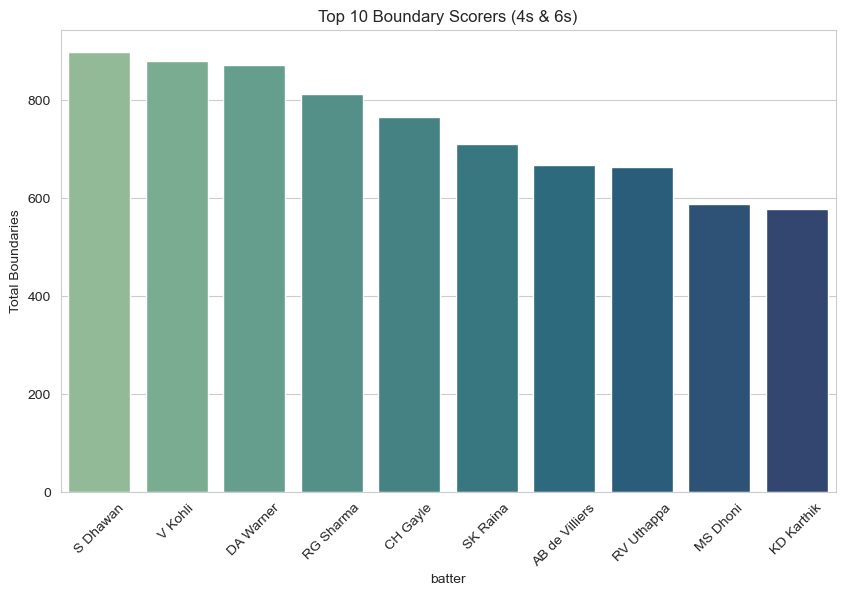

In [45]:
# Top Boundary Scorers (4s + 6s)
plt.figure(figsize=(10,6))
boundaries = merged_data[merged_data['runs_off_bat'].isin([4,6])]
boundary_counts = boundaries['batter'].value_counts().head(10)

sns.barplot(x=boundary_counts.index, y=boundary_counts.values, palette='crest')
plt.title("Top 10 Boundary Scorers (4s & 6s)")
plt.ylabel("Total Boundaries")
plt.xticks(rotation=45)
plt.savefig(r'E:/ipl-data-analysis/output/graphs/top_10_boundary_scorers.png', bbox_inches='tight')
plt.show()

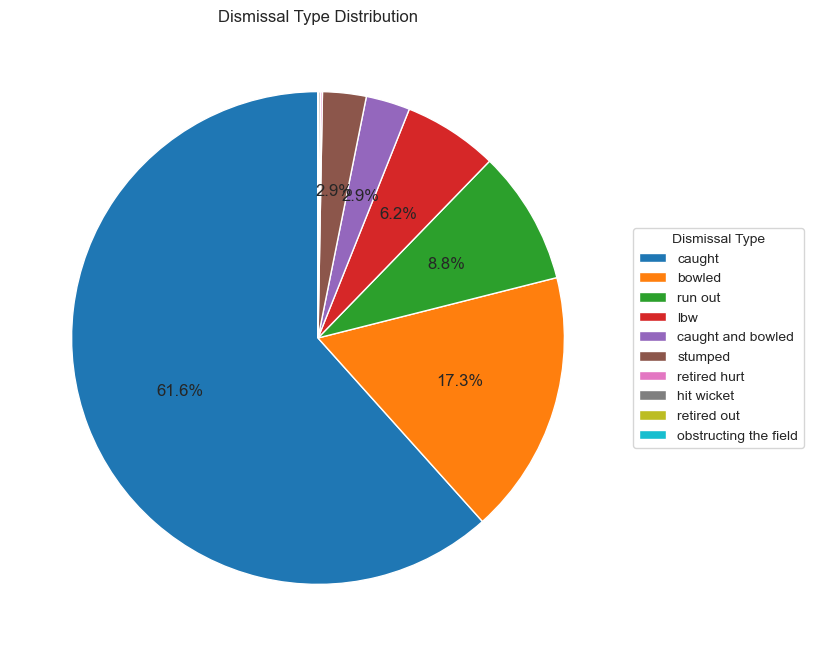

In [44]:
plt.figure(figsize=(8,8))
dismissals = merged_data[merged_data['wkt_type'].notnull()]
dismissals_count = dismissals['wkt_type'].value_counts()

def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct >= 1 else ''

wedges, texts, autotexts = plt.pie(dismissals_count,autopct=autopct_format,startangle=90,textprops={'fontsize': 12})

plt.legend(wedges, dismissals_count.index, title="Dismissal Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Dismissal Type Distribution")
plt.savefig(r'E:/ipl-data-analysis/output/graphs/dismissal_type_distribution.png', bbox_inches='tight')
plt.show()

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_18116\1220855297.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_match_counts.index, y=city_match_counts.values, palette='viridis')


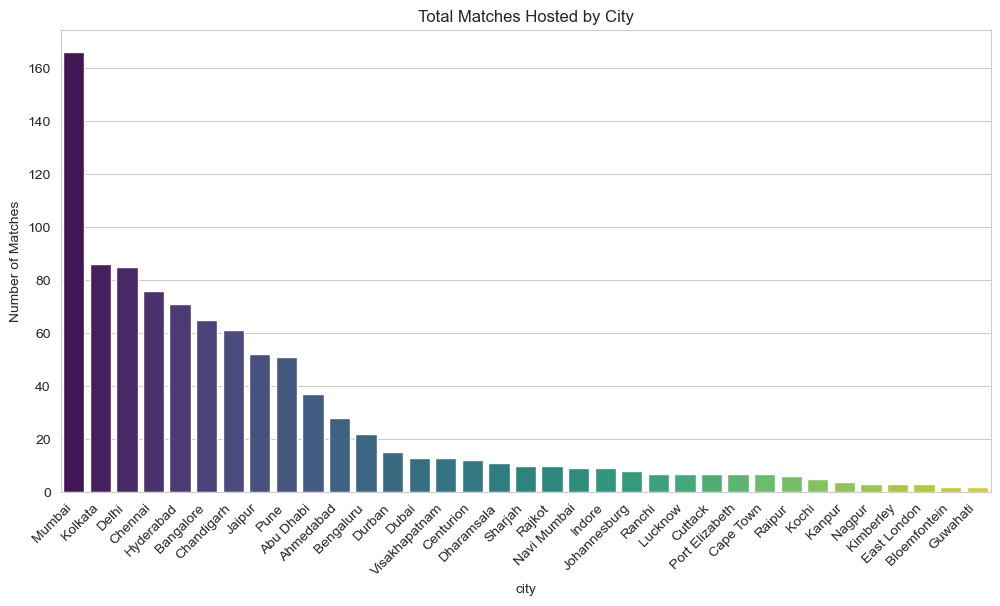

In [37]:
# City-wise Total Matches Hosted
plt.figure(figsize=(12,6))
city_match_counts = match_info['city'].value_counts().sort_values(ascending=False)

sns.barplot(x=city_match_counts.index, y=city_match_counts.values, palette='viridis')
plt.title("Total Matches Hosted by City")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45, ha='right')
plt.savefig(r'E:/ipl-data-analysis/output/graphs/total_matches_by_city.png', bbox_inches='tight')
plt.show()